### Text Classification

In [1]:
%matplotlib inline

import pandas as pd

In [2]:
#https://www.kaggle.com/zynicide/wine-reviews/data

wine_df = pd.read_csv('data/wine_reviews.csv')


In [3]:
wine_df['points'].value_counts()

87     16933
86     12600
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [4]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

![google_search.png](images/google_search.png)

In [5]:
pd.set_option('display.max_colwidth', 120)



In [6]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...
1    This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...
2    Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...
3    Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...
4    Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...
Name: description, dtype: object

In [7]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,Low
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,Low


### Turning words in to features

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


# 1. Set up your model, fixing any parameters.

In [9]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

# 2. Fit your model

`model.fit(X)`

In [10]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

# Inpsect your model

In [11]:
len(vectorizer.get_feature_names())

400

# 3. Create new data based on your model

In [12]:
review_word_counts = vectorizer.transform(wine_df['description'])

What words are associated with well-reviewed wines?

In [13]:
wine_df['rating'].value_counts()

Low     51493
High    33635
Name: rating, dtype: int64

# 1. Set up your model, fixing any parameters.

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb_classifier = MultinomialNB()


# 2. Fit your model

`model.fit(X)`

`model.fit(X, Y)`

In [41]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## We have coefficients now

In [42]:
nb_classifier.coef_[0]

array([ -7.33467081,  -7.24590289,  -7.19142933,  -7.20616256,
        -7.38885524,  -8.18761044,  -8.89070795, -11.09798286,
        -7.20061213,  -7.24397425,  -6.69237287,  -4.00593826,
        -6.70465667,  -7.24397425,  -7.25950854,  -6.263145  ,
        -6.67477066,  -6.92639671,  -6.56148092,  -6.14471991,
        -6.39337878,  -6.09342661,  -7.16437628,  -4.84345499,
        -6.96645929,  -6.27185332,  -7.04067957,  -3.78998822,
        -6.93484747,  -6.76128647,  -5.86105745,  -7.28728811,
        -6.39585097,  -7.30147274,  -6.26459113,  -5.88949074,
        -6.73083916,  -7.12085331,  -8.99606846,  -9.17839002,
        -6.77928336,  -4.62605818,  -6.80255446,  -7.28127003,
        -6.45534174,  -5.38365017,  -5.85864374,  -4.66095875,
        -6.82131674,  -5.29641393,  -6.28284647,  -5.05147071,
        -7.33256333,  -7.57162234,  -6.77807344,  -5.25233262,
        -6.4614902 ,  -7.22300113,  -7.28127003,  -6.99910314,
        -6.93202261,  -6.6704181 ,  -5.11679824,  -6.92

In [43]:
coeficients = pd.Series(nb_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

In [46]:
coeficients.sort_values(ascending=True)[:20]

2022          -11.097983
beautifully    -9.178390
beautiful      -8.996068
2020           -8.890708
impressive     -8.733704
opulent        -8.667564
velvety        -8.297381
lovely         -8.264770
cellar         -8.248854
focused        -8.222879
potential      -8.187610
2019           -8.187610
tightly        -8.057799
producer       -7.875477
layered        -7.868257
purple         -7.868257
provide        -7.839886
develop        -7.822555
polished       -7.798785
vines          -7.792096
dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Construct a model of UN speeches to distinquish between those before and after the collapse of the Soviet Union.</p>
</div>


# 3. Create new data based on your model

In [47]:
nb_classifier.predict(review_word_counts)

array(['Low', 'High', 'Low', ..., 'Low', 'High', 'High'], dtype='<U4')

In [48]:
wine_df['prediction']  = nb_classifier.predict(review_word_counts)

In [49]:
pd.crosstab(wine_df['rating'], wine_df['prediction'])

prediction,High,Low
rating,,
High,26996,6639
Low,7884,43609


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [51]:
accuracy_score(wine_df['rating'], wine_df['prediction'])

0.8293980828869467

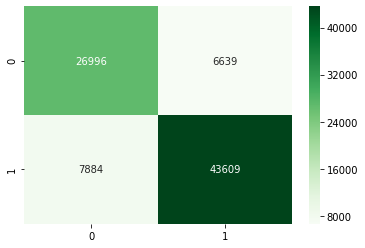

In [52]:
import seaborn as sns

cm = confusion_matrix(wine_df['rating'], wine_df['prediction'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


In [53]:
print(classification_report(wine_df['rating'], wine_df['prediction']))

              precision    recall  f1-score   support

        High       0.77      0.80      0.79     33635
         Low       0.87      0.85      0.86     51493

    accuracy                           0.83     85128
   macro avg       0.82      0.82      0.82     85128
weighted avg       0.83      0.83      0.83     85128



Precision: % of selected items that are correct 

Recall: % of correct items that are selected



<div class="alert alert-info">
<h3> Your turn</h3>
<p> How's your Kickstarter model doing? How many correct? Is it balanced?</div>



In [54]:
nb_classifier.predict_proba(review_word_counts)

array([[0.05837039, 0.94162961],
       [0.8189896 , 0.1810104 ],
       [0.0073304 , 0.9926696 ],
       ...,
       [0.31987064, 0.68012936],
       [0.92064944, 0.07935056],
       [0.65113375, 0.34886625]])

In [55]:
predict_df = pd.DataFrame(nb_classifier.predict_proba(review_word_counts), 
                          columns=nb_classifier.classes_)

In [56]:
predict_df.head()

,High,Low
0,0.058370,0.941630
1,0.818990,0.181010
2,0.007330,0.992670
3,0.009965,0.990035
4,0.017779,0.982221


In [57]:
wine_df_prediction = pd.concat([wine_df, predict_df], axis = 1)

In [58]:
wine_df_prediction.sort_values('High', ascending=False)[['description','points']].head(15)

ValueError: The column label 'High' is not unique.

In [59]:
wine_df_prediction.sort_values('Low', ascending=False)[['description','points']].head(15)

ValueError: The column label 'Low' is not unique.

<div class="alert alert-info">
<h3> Your turn</h3>
  <p> Which <b>post 1989</b> speech had the highest likelihood of being delivered during an earlier period?

</div>



### What about overfitting?

In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wine_df, test_size=0.2)

In [61]:
len(train)

68102

In [62]:
len(test)

17026

In [63]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

vectorizer.fit(train['description'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [64]:
X_train = vectorizer.transform(train['description'])

In [65]:
nb_classifier.fit(X_train, train['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [67]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.8273618983289771


In [68]:
test_wf         = vectorizer.transform(test['description'])
test_prediction = nb_classifier.predict(test_wf)

In [69]:
print(accuracy_score(test['rating'], test_prediction))

0.8350170327734053


In [70]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,3),
                             stop_words = 'english',
                             max_df = .60,
                             min_df = 5,
                             max_features = None)

In [71]:
vectorizer.fit(train['description'])
print(len(vectorizer.get_feature_names()))
X_train = vectorizer.transform(train['description'])
nb_classifier.fit(X_train, train['rating'])


76751


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.9169040556811842


In [73]:

print(accuracy_score(test['rating'],
                     nb_classifier.predict(vectorizer.transform(test['description']))))


0.8901679783859979


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What happens to your model if you change some of the parameters for your vectorizer? Be sure to spit the data between train and test!

</div>




# What about a different model?

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
ln_classifier = LogisticRegression()

In [76]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,2),
                             stop_words = 'english',
                             min_df = .01,
                             max_features = None)

vectorizer.fit(train['description'])

print(len(vectorizer.get_feature_names()))
ln_classifier.fit(vectorizer.transform(train['description']), train['rating'])

457


/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
print(accuracy_score(train['rating'],
                     ln_classifier.predict(vectorizer.transform(train['description']))))

0.8833220757099645


In [78]:
print(accuracy_score(test['rating'],
                     ln_classifier.predict(vectorizer.transform(test['description']))))

0.8830024668154587


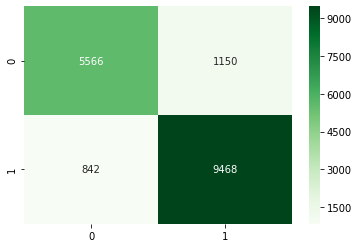

In [79]:
test_prediction = ln_classifier.predict(vectorizer.transform(test['description']))

cm = confusion_matrix(test['rating'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')



<div class="alert alert-info">
<h3> Your turn</h3>
What is the out sample accuracy of a logistic regression model on your data?
<p><code> from sklearn.linear_model import LogisticRegression

</div>





# What about a different model?

![](images/knn1.png)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tf_vector  = TfidfVectorizer(lowercase  =  True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             max_df      = .60,
                             min_df      = .05,
                             max_features = None)

In [89]:
train, test = train_test_split(wine_df, test_size=0.7)

In [90]:
tf_vector.fit(train['description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [91]:
review_tf = tf_vector.transform(train['description'])

In [92]:
knn_classifier.fit(review_tf, train['rating'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
knn_prediction = knn_classifier.predict(review_tf)

In [94]:

print(accuracy_score(train['rating'], knn_prediction))



0.8431748766543974


In [95]:
print(classification_report(train['rating'], knn_prediction))

              precision    recall  f1-score   support

        High       0.84      0.74      0.79      9987
         Low       0.85      0.91      0.88     15551

   micro avg       0.84      0.84      0.84     25538
   macro avg       0.84      0.83      0.83     25538
weighted avg       0.84      0.84      0.84     25538



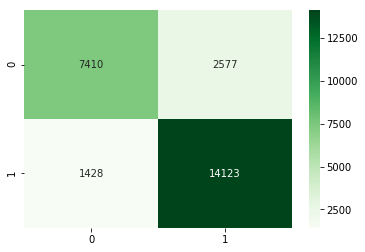

In [96]:
cm = confusion_matrix(train['rating'], knn_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What does a k-nearest neigbhor for your speech dataset look like? (Don't forget to shrink your dataframe). How does the accuracy compare?
</div>





![](images/knn2.png)

In [97]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)

# But what's the best fitting model?

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# old model: knn_classifier = KNeighborsClassifier(n_neighbors = 3)

parameters = {'n_neighbors' : [2,3, 7],
              'weights'      : ['distance', 'uniform']}
              

In [88]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    parameters, 
                    cv = 5)

![](images/cv.png)


# But what's the best fitting model?

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
pipeline = Pipeline([
                     ('vectorizer' , CountVectorizer()),
                     ('classifier' , LogisticRegression())
                    ])

parameters = {'vectorizer__max_features' : [300, 500, 700],
               }




In [84]:
grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs = -1,
                           cv = 5,
                           verbose = 1)

In [85]:
grid_search.fit(wine_df['description'],
                wine_df['rating'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   52.7s finished
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                      

In [86]:
grid_search.best_score_

0.8988934310685086

In [87]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=700, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
              

In [88]:
grid_search.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=700, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_clas

<div class="alert alert-info">
<h3> Homework</h3>
<p> The "data" folder contains board games descriptions scraped from BoardGameGeeks.com. Analyze the relationship between the words in the <code>description</code> and whether or not reviewers thought it was a <code>quality_game</code>. 
</div>




